# Measuring Variability
This csv file below contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).

For each of the metrics the standard deviation is calculated for a sample size of 5000 unique cookies visiting the course overview page.

## baseline values

In [13]:
#import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#import csv file
baseline = pd.read_csv('Final Project Baseline Values - Sheet1.csv', header=None)
baseline

,0,1
0,Unique cookies to view course overview page pe...,40000.000000
1,"Unique cookies to click ""Start free trial"" per...",3200.000000
2,Enrollments per day:,660.000000
3,"Click-through-probability on ""Start free trial"":",0.080000
4,"Probability of enrolling, given click:",0.206250
5,"Probability of payment, given enroll:",0.530000
6,"Probability of payment, given click",0.109313


In [14]:
# adjust the dataset 
baseline.columns = ['Metrics','Estimator']
baseline['Metrics'] = ['cookies', 'cliks', 'user-id','click-through-probability','gross conversion','retention','net conversion']
baseline['dmin'] = [3000, 240, -50, 0.01, -0.01, 0.01, 0.0075]
baseline

,Metrics,Estimator,dmin
0,cookies,40000.000000,3000.0000
1,cliks,3200.000000,240.0000
2,user-id,660.000000,-50.0000
3,click-through-probability,0.080000,0.0100
4,gross conversion,0.206250,-0.0100
5,retention,0.530000,0.0100
6,net conversion,0.109313,0.0075


## scaled estimator
Since we have already set the sample size of 5000 unique cookies, we should calculate the estimated data for clicks, user-id, which are necessary for us to get the standard deviation in the certain sample size.

In [15]:
# insert column
baseline['Scaled Estimator'] = np.nan

# scaled fraction 
fraction = 5000/40000

for i in range(3):
    baseline.loc[i,'Scaled Estimator'] = baseline['Estimator'][i]*fraction
    
baseline

,Metrics,Estimator,dmin,Scaled Estimator
0,cookies,40000.000000,3000.0000,5000.0
1,cliks,3200.000000,240.0000,400.0
2,user-id,660.000000,-50.0000,82.5
3,click-through-probability,0.080000,0.0100,NaN
4,gross conversion,0.206250,-0.0100,NaN
5,retention,0.530000,0.0100,NaN
6,net conversion,0.109313,0.0075,NaN


## Assumption
Now, we can calculate the standard deviation of gross conversion, retention, and net conversion. And there is an assumption that we should make. For those three propability metrics, we assume their distributions are approximately normal (binomial distribution) because the scaled estimators are large (Central Limit Theorem).

However, if we are not sure. We can also test it using the normal approximation, i.e np>10 and np(1-p)>10

In [16]:
# the normal approximation function
def normal_A(n,p,metric):
    if 10 < n*p and 10 < n*(1-p):
        print(metric,":  n =", n, "is valid")
    else:
        print(metric,":  n =", n, "is not valid")

# check 
# remember the sample size for different metrics are different
for i,j in zip([1,2,1],[4,5,6]):
    normal_A (baseline.loc[i, "Scaled Estimator"], baseline.loc[j,"Estimator"], baseline.loc[j,"Metrics"])

gross conversion :  n = 400.0 is valid
retention :  n = 82.5 is valid
net conversion :  n = 400.0 is valid


## standard deviation
Now we can set the assumption that these three metrics are approximately binomial distribution.
In binomial distribution, the standard deviation = sqrt(p(1-p)/n)

In [17]:
# inset column
baseline.insert(3, 'Standard Deviation', np.nan)

# the std function
import math
def b_std(n,p):
    return math.sqrt(p*(1-p)/n)

# calculation
for i,j in zip([1,2,1],[4,5,6]):
    baseline.loc[j,'Standard Deviation'] = b_std(baseline.loc[i, "Scaled Estimator"], baseline.loc[j,"Estimator"])

baseline

,Metrics,Estimator,dmin,Standard Deviation,Scaled Estimator
0,cookies,40000.000000,3000.0000,NaN,5000.0
1,cliks,3200.000000,240.0000,NaN,400.0
2,user-id,660.000000,-50.0000,NaN,82.5
3,click-through-probability,0.080000,0.0100,NaN,NaN
4,gross conversion,0.206250,-0.0100,0.020231,NaN
5,retention,0.530000,0.0100,0.054949,NaN
6,net conversion,0.109313,0.0075,0.015602,NaN


Notice: Since the denominator for gross conversion and net conversion is the number of clicks, which is also the unit of diversion, we can expect their analytical variance is close to the empirical variance. However, for the rentention, we recommend to collect an empirical variance. Based on the difference between the denominator and the unit of diversion, we could expect the empirical variance of the retention would be higher than the analyticaal variance.

# Sizing
## Choosing Number of Samples given Power
### calculation
We set the alpha to be 0.05 and the statistical power to be 0.80 (i.e. beta is 0.20).   
And we applied an online caculator: https://www.evanmiller.org/ab-testing/sample-size.html

### Gross Conversion
Baseline Conversion: 20.625%   
Minimum Detectable Effect: 1%   
alpha: 5%   
beta: 20%   
1 - beta: 80%   
sample size = 25,835 enrollments/group   
Number of groups = 2 (experiment and control)   
total sample size = 51,670 enrollments   
clicks/pageview: 3200/40000 = .08 clicks/pageview   
pageviews = 645,875   
### Retention
Baseline Conversion: 53%   
Minimum Detectable Effect: 1%   
alpha: 5%   
beta: 20%   
1 - beta: 80%   
sample size = 39,155 enrollments/group   
Number of groups = 2 (experiment and control)   
total sample size = 78,230 enrollments   
enrollments/pageview: 660/40000 = .0165 enrollments/pageview   
pageviews = 78,230/.0165 = 4,741,212   
### Net Conversion
Baseline Conversion: 10.9313%   
Minimum Detectable Effect: .75%   
alpha: 5%   
beta: 20%   
1 - beta: 80%   
sample size = 27,413 enrollments/group   
Number of groups = 2 (experiment and control)   
total sample size = 54,826   
clicks/pageview: 3200/40000 = .08 clicks/pageview   
pageviews = 685,325   

In [18]:
# inset column
baseline['samplesize'] = [np.nan,np.nan,np.nan,np.nan,645875,4741212,685325]

baseline

,Metrics,Estimator,dmin,Standard Deviation,Scaled Estimator,samplesize
0,cookies,40000.000000,3000.0000,NaN,5000.0,NaN
1,cliks,3200.000000,240.0000,NaN,400.0,NaN
2,user-id,660.000000,-50.0000,NaN,82.5,NaN
3,click-through-probability,0.080000,0.0100,NaN,NaN,NaN
4,gross conversion,0.206250,-0.0100,0.020231,NaN,645875.0
5,retention,0.530000,0.0100,0.054949,NaN,4741212.0
6,net conversion,0.109313,0.0075,0.015602,NaN,685325.0


Given the calculation above, to test these three hypothesis, we need 4,741,212 pageviews.

# Choosing Duration vs. Exposure
From the Udacity, given there are 40k pageviews per day, we can first assume we can use 100% of users for this experiment.

In [19]:
# gross conversion, retention and net conversion
print('for the experiment with gross conversion, retention and net conversion, we need: ', 
      round(4741212/40000),' days')

# gross conversion and net conversion
print('for the experiment with gross conversion and net conversion, we need: ', 
      round(685325/40000),' days')

for the experiment with gross conversion, retention and net conversion, we need:  119  days
for the experiment with gross conversion and net conversion, we need:  17  days


Notice: We can see there is a huge difference in experiment duration between using and discarding retention. Therefore, we decide to remove the retention metric for this experiment. Because firstly, using the retention metric will take a long time to conduct this experiment, which will cause opportunity costs(eg. launch more different experiments, spend more time on other feature improvements). Moreover, there will be some business risks that exist if we use the retention metric. For instance, this change will give a worse user experiment decreasing the conversion rate.

Also, for the experiment with gross conversion and net conversion, we should reconsider the fraction of Udacity's traffic to be diverted. Considering there might be some seasonal effect for this experiment, 17 days seems not enough for us to certain. Secondly, using full traffic is very costly and risky (opportunity cost & business risk we mentioned above). Diverting a half or lower of traffic will be much safer.

In [20]:
# gross conversion and net conversion
# 50% traffic
print('for the experiment using 50% traffic with gross conversion and net conversion, we need: ', 
      round(685325/(40000*0.5)),' days')

# gross conversion and net conversion
# 45% traffic
print('for the experiment using 45% traffic with gross conversion and net conversion, we need: ', 
      round(685325/(40000*0.45)),' days')

for the experiment using 50% traffic with gross conversion and net conversion, we need:  34  days
for the experiment using 45% traffic with gross conversion and net conversion, we need:  38  days


It seems that 38 days are little bit longer, so we will divert 50% traffic for the experiment with gross conversion and net conversion.

# Analysis
Now, we have two datasets from Udacity, one for control group and one for experiment group.

The meaning of each column is:

Pageviews: Number of unique cookies to view the course overview page that day.   
Clicks: Number of unique cookies to click the course overview page that day.   
Enrollments: Number of user-ids to enroll in the free trial that day.   
Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [22]:
# import dataset
control = pd.read_csv('Final Project Results - Control.csv')
experiment = pd.read_csv('Final Project Results - Experiment.csv')
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [ ]:
experiment.head()

In [ ]:
# the duration for this experiment 
print('control group duration:\n', control.count())
print('experiment group duration:\n', experiment.count())

In [ ]:
# calculate the sample size for this dataset that Udacity provide us
print('control size: ' , control['Pageviews'].sum())
print('experiment size: ' , experiment['Pageviews'].sum())
print('sample size: ' , control['Pageviews'].sum()+experiment['Pageviews'].sum())

Seems the control group size are larger than the experiment group size, we will figure out whether this difference within our expectations in future.
Now, we can make some visualizations to make a clear comparison between control and experiment groups.

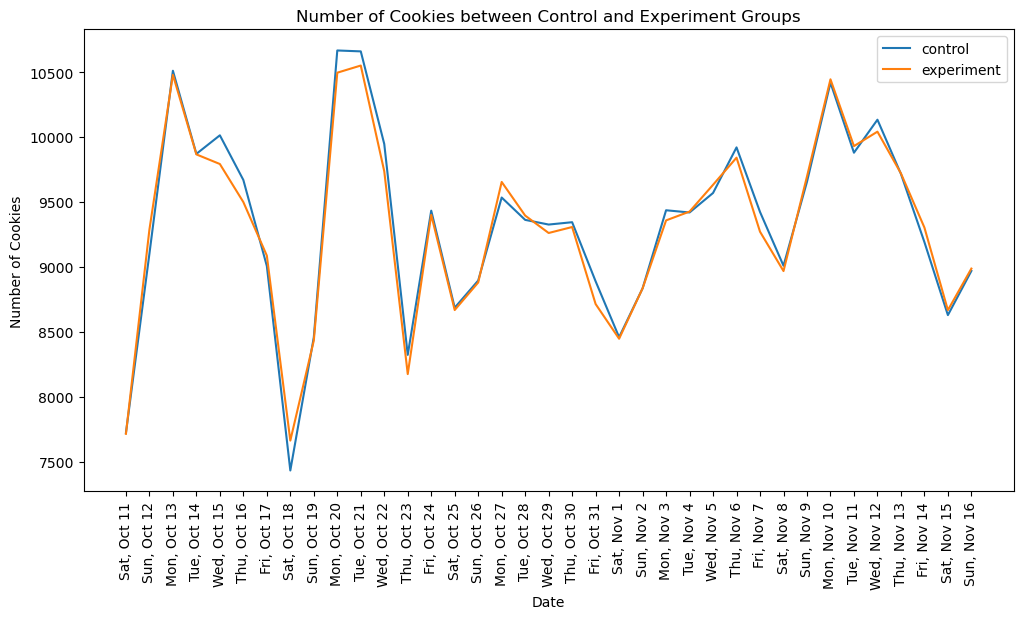

In [23]:
# invariant: Number of cookies
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Pageviews'],label = 'control')
line2 = plt.plot(x ,experiment['Pageviews'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Cookies')
plt.title('Number of Cookies between Control and Experiment Groups')
plt.legend()

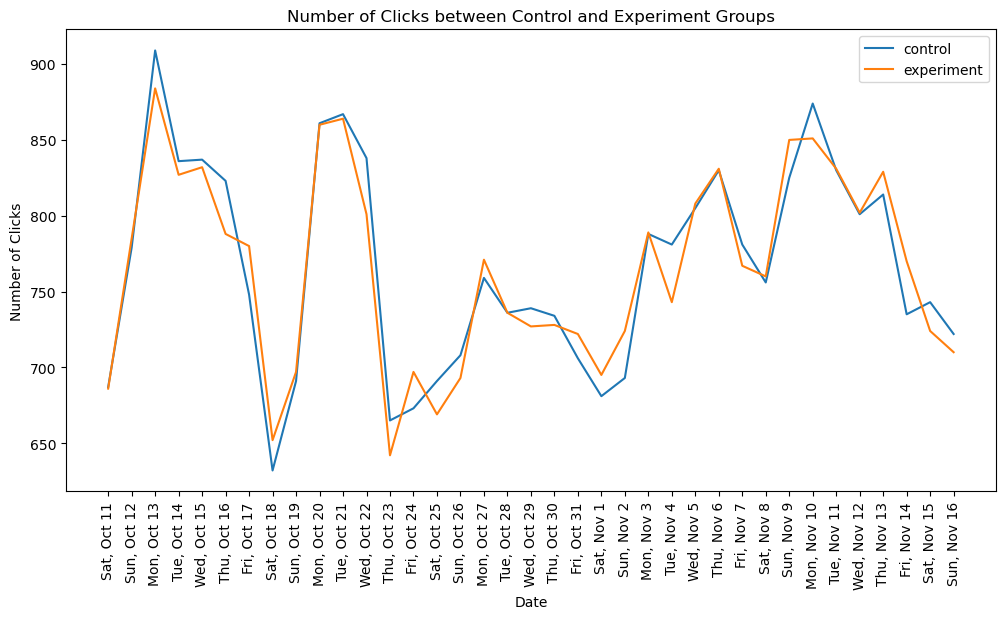

In [24]:
# invariant: Number of clicks
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Clicks'],label = 'control')
line2 = plt.plot(x ,experiment['Clicks'], label = 'experiment')
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks between Control and Experiment Groups')
plt.legend()

In [ ]:
# invariant: click through probability (Number of clicks / Number of cookies)
plt.figure(figsize=(12,6))
x = control['Date']
line1 = plt.plot(x ,control['Clicks']/control['Pageviews'],label = 'control')
line2 = plt.plot(x ,experiment['Clicks']/experiment['Pageviews'], label = 'experiment') 
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Click Through Probability')
plt.title('Click Through Probability between Control and Experiment Groups')
plt.legend()

Here we also found there is a dramatically drop on click through rate on Oct. 24th. It's worthwhile to find the potential reason and effects.

Sanity Checks
Cookies
First, we've already calculated the size of control group and experiment group:

control group size: 345543
experiment size: 344660
sample size: 690203
Is the difference between the size of control group and experiment group within our expectations?

Given each cookie is randomly assgined to the control or experiment group with probability 0.5. If we now regard being assigned to the control group as a success, we can use the binominal distribution to model the number of successes in the given whole sample (control+experiment) and perform a binomial test as sanity check. (We further assume the whole sample size are large enough to approach the normal distribution (Central Limit Theorem)).

In [ ]:
# create a new dataframe
Sanity_Check = pd.DataFrame(index = ['Cookies','Clicks','CTP'], 
                            columns=['CI_lower','CI_upper','obs','passes or not',])
Sanity_Check.obs = [control['Pageviews'].sum()/(control['Pageviews'].sum()+experiment['Pageviews'].sum()),
      control['Clicks'].sum()/(control['Clicks'].sum()+experiment['Clicks'].sum()),np.nan]
Sanity_Check

In [ ]:
# binomial test function
prob = 0.5
alpha = 0.05

def binomial_test(A,B):
    std = math.sqrt(0.5*0.5/(control[A].sum()+experiment[A].sum()))
    ME = std*1.96
    Sanity_Check.loc[B,'CI_lower'], Sanity_Check.loc[B,'CI_upper'] = 0.5-ME, 0.5+ME
    if Sanity_Check.loc[B,'CI_lower'] <= Sanity_Check.loc[B,'obs'] <= Sanity_Check.loc[B,'CI_upper']:
        Sanity_Check.loc[B,'passes or not'] = 1
    else:
        Sanity_Check.loc[B,'passes or not'] = 0 

binomial_test('Pageviews','Cookies')    
    
Sanity_Check

In [ ]:
# For the Clicks metric, we can also use the binomial test.

binomial_test('Clicks','Clicks')    
    
Sanity_Check